# Student Dropout Classification

This notebook follows the classification methodology from Chapter 3 (MNIST Classification) adapted for the Student Dropout dataset.

## Dataset Overview
- **Dataset**: Student Dropout and Academic Success Dataset
- **Dataset Path**: `Classification/students_dropout_academic_success.csv`
- **Target Classes**: 
  - Dropout (1421 samples)
  - Enrolled (794 samples)
  - Graduate (2209 samples)
- **Features**: 36 features including academic performance, demographics, and enrollment information
- **Total Samples**: 4424

## Notebook Structure
This notebook contains 16 comprehensive steps covering:
1. Data loading and exploration
2. Train/test splitting
3. Binary classification (Dropout detector)
4. Cross-validation evaluation
5. Confusion matrix analysis
6. Precision, Recall, F1 metrics
7. Precision-Recall trade-off
8. ROC curve analysis
9. Multiclass classification
10. Feature scaling
11. Error analysis
12. Final model evaluation
13. Multilabel classification
14. Model comparison
15. Hyperparameter tuning
16. Visualization (2D projection)


In [1]:
# Step 1: Load and Explore the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Classification/students_dropout_academic_success.csv')

# Explore dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")  # Excluding target column
print(f"Samples: {df.shape[0]}")

# Display basic information
print("\n" + "="*50)
print("Dataset Info:")
print("="*50)
df.info()

# Display first few rows
print("\n" + "="*50)
print("First 5 rows:")
print("="*50)
df.head()


Dataset shape: (4424, 37)
Features: 36
Samples: 4424

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          44

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Target variable distribution:
target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Target variable percentages:
target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


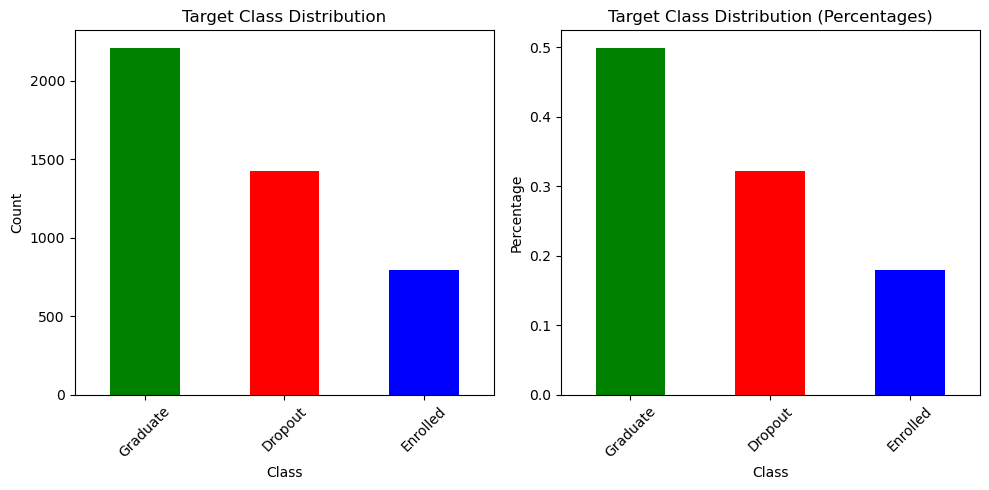


Missing Values:
No missing values found!


In [2]:
# Explore target variable distribution
print("Target variable distribution:")
print(df['target'].value_counts())
print("\nTarget variable percentages:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['target'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Target Class Distribution (Percentages)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Check for missing values
print("\n" + "="*50)
print("Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTarget classes: {y.unique()}")
print(f"Number of classes: {len(y.unique())}")

# Display feature names
print(f"\nFeature columns ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")


X shape: (4424, 36)
y shape: (4424,)

Target classes: ['Dropout' 'Graduate' 'Enrolled']
Number of classes: 3

Feature columns (36):
 1. Marital Status
 2. Application mode
 3. Application order
 4. Course
 5. Daytime/evening attendance
 6. Previous qualification
 7. Previous qualification (grade)
 8. Nacionality
 9. Mother's qualification
10. Father's qualification
11. Mother's occupation
12. Father's occupation
13. Admission grade
14. Displaced
15. Educational special needs
16. Debtor
17. Tuition fees up to date
18. Gender
19. Scholarship holder
20. Age at enrollment
21. International
22. Curricular units 1st sem (credited)
23. Curricular units 1st sem (enrolled)
24. Curricular units 1st sem (evaluations)
25. Curricular units 1st sem (approved)
26. Curricular units 1st sem (grade)
27. Curricular units 1st sem (without evaluations)
28. Curricular units 2nd sem (credited)
29. Curricular units 2nd sem (enrolled)
30. Curricular units 2nd sem (evaluations)
31. Curricular units 2nd sem (app

In [4]:
# Step 2: Split Data into Train and Test Sets
# Using stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures same class distribution in train and test
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nTraining set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())


Training set size: 3539 (80.0%)
Test set size: 885 (20.0%)

Training set class distribution:
target
Graduate    1767
Dropout     1137
Enrolled     635
Name: count, dtype: int64

Test set class distribution:
target
Graduate    442
Dropout     284
Enrolled    159
Name: count, dtype: int64


In [5]:
# Step 3: Train a Binary Classifier (Dropout-detector)
# Similar to the "5-detector" in MNIST, we'll create a "Dropout-detector"
from sklearn.linear_model import SGDClassifier

# Create binary labels for "Dropout" vs "not-Dropout"
y_train_dropout = (y_train == 'Dropout')
y_test_dropout = (y_test == 'Dropout')

print(f"Training set - Dropout: {y_train_dropout.sum()}, Not-Dropout: {(~y_train_dropout).sum()}")
print(f"Test set - Dropout: {y_test_dropout.sum()}, Not-Dropout: {(~y_test_dropout).sum()}")

# Train SGD Classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_dropout)

# Test prediction on first instance
some_student = X_train.iloc[0:1]
prediction = sgd_clf.predict(some_student)
print(f"\nPrediction for first student: {'Dropout' if prediction[0] else 'Not-Dropout'}")
print(f"Actual label: {y_train.iloc[0]}")


Training set - Dropout: 1137, Not-Dropout: 2402
Test set - Dropout: 284, Not-Dropout: 601

Prediction for first student: Not-Dropout
Actual label: Graduate


In [6]:
# Step 4: Evaluate Performance with Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

# Cross-validation accuracy for SGD Classifier
print("Evaluating SGD Classifier with Cross-Validation...")
cv_scores = cross_val_score(sgd_clf, X_train, y_train_dropout, cv=3, scoring="accuracy")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Compare with a dummy classifier (baseline)
print("\n" + "="*50)
print("Comparing with Dummy Classifier (baseline):")
print("="*50)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_dropout)
dummy_cv_scores = cross_val_score(dummy_clf, X_train, y_train_dropout, cv=3, scoring="accuracy")
print(f"Dummy classifier CV scores: {dummy_cv_scores}")
print(f"Mean dummy accuracy: {dummy_cv_scores.mean():.4f}")
print(f"\nImprovement over baseline: {(cv_scores.mean() - dummy_cv_scores.mean())*100:.2f}%")


Evaluating SGD Classifier with Cross-Validation...
Cross-validation scores: [0.33559322 0.61440678 0.68447837]
Mean CV accuracy: 0.5448 (+/- 0.3014)

Comparing with Dummy Classifier (baseline):
Dummy classifier CV scores: [0.67881356 0.67881356 0.67854114]
Mean dummy accuracy: 0.6787

Improvement over baseline: -13.39%


Confusion Matrix:
[[1225 1177]
 [ 434  703]]

Confusion Matrix Interpretation:
True Negatives (TN): 1225 - Correctly predicted as 'Not-Dropout'
False Positives (FP): 1177 - Incorrectly predicted as 'Dropout' (Type I error)
False Negatives (FN): 434 - Incorrectly predicted as 'Not-Dropout' (Type II error)
True Positives (TP): 703 - Correctly predicted as 'Dropout'


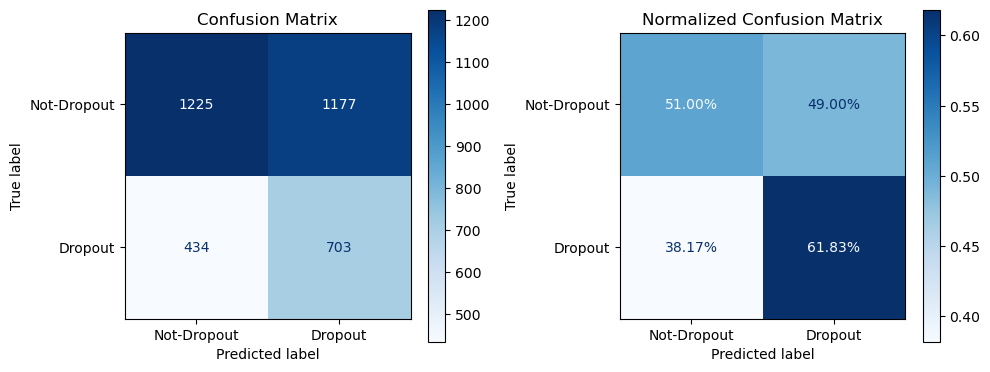

In [7]:
# Step 5: Analyze with Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions via cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_dropout, cv=3)

# Confusion matrix
cm = confusion_matrix(y_train_dropout, y_train_pred)
print("Confusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (TN): {cm[0, 0]} - Correctly predicted as 'Not-Dropout'")
print(f"False Positives (FP): {cm[0, 1]} - Incorrectly predicted as 'Dropout' (Type I error)")
print(f"False Negatives (FN): {cm[1, 0]} - Incorrectly predicted as 'Not-Dropout' (Type II error)")
print(f"True Positives (TP): {cm[1, 1]} - Correctly predicted as 'Dropout'")

# Visualize confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Standard confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not-Dropout', 'Dropout'])
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix')

# Normalized confusion matrix - FIXED: use from_predictions with normalize parameter and ax
disp_norm = ConfusionMatrixDisplay.from_predictions(y_train_dropout, y_train_pred,
                                                    display_labels=['Not-Dropout', 'Dropout'],
                                                    normalize='true',
                                                    ax=axes[1],
                                                    cmap='Blues', values_format='.2%')
axes[1].set_title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()


In [8]:
# Step 6: Calculate Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_dropout, y_train_pred)
recall = recall_score(y_train_dropout, y_train_pred)
f1 = f1_score(y_train_dropout, y_train_pred)

print("Performance Metrics:")
print("="*50)
print(f"Precision: {precision:.4f}")
print(f"  → When the model predicts 'Dropout', it is correct {precision*100:.2f}% of the time")
print(f"\nRecall: {recall:.4f}")
print(f"  → The model detects {recall*100:.2f}% of all actual dropouts")
print(f"\nF1 Score: {f1:.4f}")
print(f"  → Harmonic mean of precision and recall")

# Calculate manually to verify understanding
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
precision_manual = TP / (TP + FP) if (TP + FP) > 0 else 0
recall_manual = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0

print("\n" + "="*50)
print("Manual Calculation Verification:")
print("="*50)
print(f"Precision = TP/(TP+FP) = {TP}/({TP}+{FP}) = {precision_manual:.4f}")
print(f"Recall = TP/(TP+FN) = {TP}/({TP}+{FN}) = {recall_manual:.4f}")
print(f"F1 = 2 × (Precision × Recall)/(Precision + Recall) = {f1_manual:.4f}")


Performance Metrics:
Precision: 0.3739
  → When the model predicts 'Dropout', it is correct 37.39% of the time

Recall: 0.6183
  → The model detects 61.83% of all actual dropouts

F1 Score: 0.4660
  → Harmonic mean of precision and recall

Manual Calculation Verification:
Precision = TP/(TP+FP) = 703/(703+1177) = 0.3739
Recall = TP/(TP+FN) = 703/(703+434) = 0.6183
F1 = 2 × (Precision × Recall)/(Precision + Recall) = 0.4660


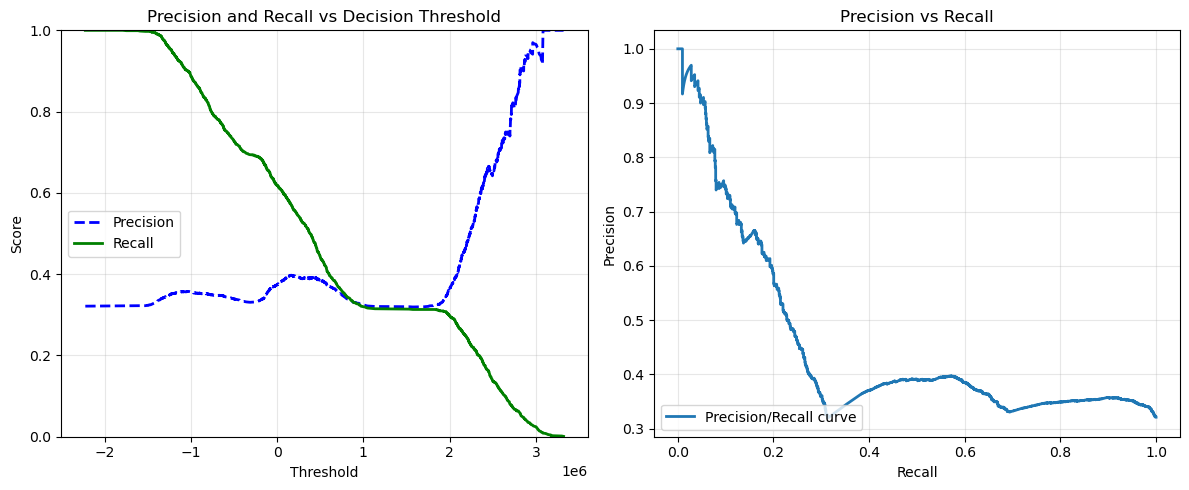

Threshold for 90% precision: 2815865.14
At this threshold - Precision: 0.9028, Recall: 0.0572

With 90% precision threshold:
  Precision: 0.9028
  Recall: 0.0572


In [9]:
# Step 7: Precision-Recall Trade-off Analysis
from sklearn.metrics import precision_recall_curve

# Get decision scores (not predictions)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_dropout, cv=3, 
                             method="decision_function")

# Calculate precision-recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_dropout, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="center left")
plt.ylim([0, 1])
plt.grid(True, alpha=0.3)
plt.title("Precision and Recall vs Decision Threshold")

# Plot precision vs recall
plt.subplot(1, 2, 2)
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.title("Precision vs Recall")

plt.tight_layout()
plt.show()

# Find threshold for 90% precision
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(f"Threshold for 90% precision: {threshold_for_90_precision:.2f}")
print(f"At this threshold - Precision: {precisions[idx_for_90_precision]:.4f}, Recall: {recalls[idx_for_90_precision]:.4f}")

# Make predictions with 90% precision threshold
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_90 = precision_score(y_train_dropout, y_train_pred_90)
recall_90 = recall_score(y_train_dropout, y_train_pred_90)
print(f"\nWith 90% precision threshold:")
print(f"  Precision: {precision_90:.4f}")
print(f"  Recall: {recall_90:.4f}")


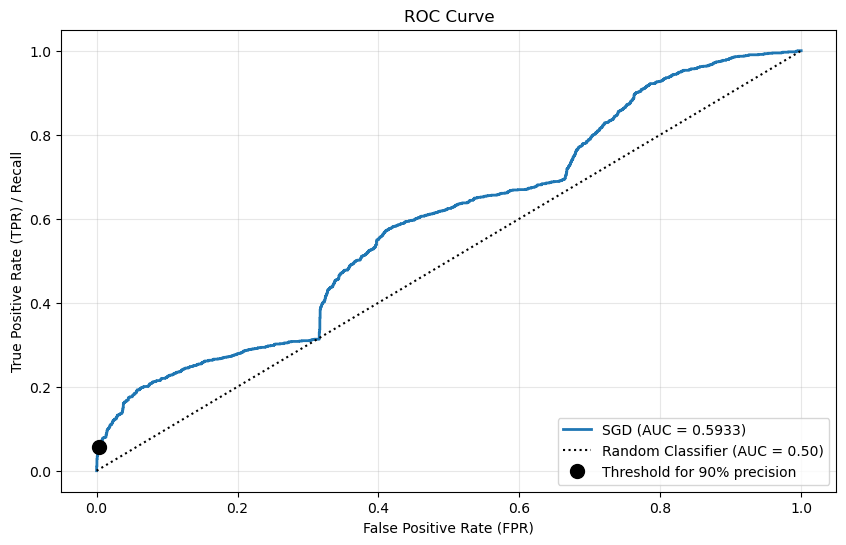

ROC AUC Score: 0.5933
  → A perfect classifier has AUC = 1.0
  → A random classifier has AUC = 0.5
  → Our classifier: 0.5933 (Poor)


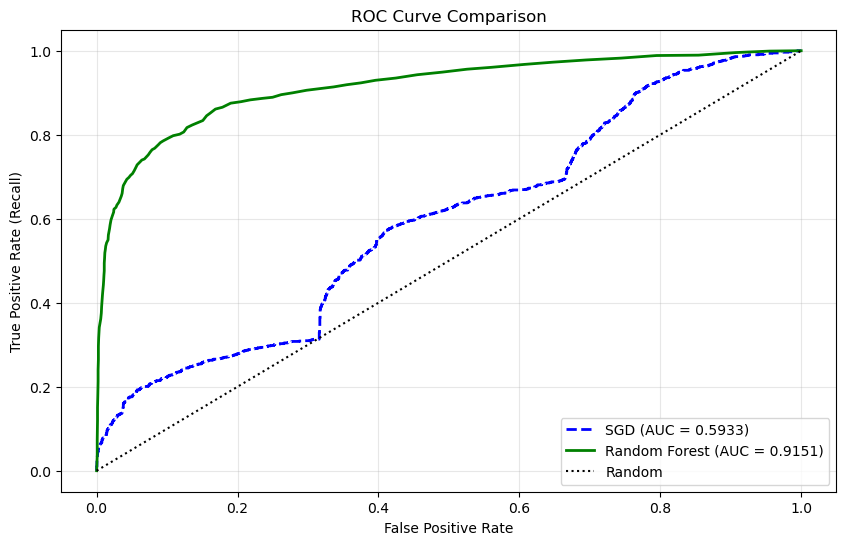

In [10]:
# Step 8: ROC Curve Analysis
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_train_dropout, y_scores)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, linewidth=2, label=f"SGD (AUC = {roc_auc_score(y_train_dropout, y_scores):.4f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random Classifier (AUC = 0.50)")

# Mark the point for 90% precision
idx_for_threshold_at_90 = (thresholds_roc <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot([fpr_90], [tpr_90], "ko", markersize=10, label="Threshold for 90% precision")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) / Recall")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# ROC AUC score
roc_auc = roc_auc_score(y_train_dropout, y_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"  → A perfect classifier has AUC = 1.0")
print(f"  → A random classifier has AUC = 0.5")
print(f"  → Our classifier: {roc_auc:.4f} ({'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.6 else 'Poor'})")

# Compare with Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_dropout, cv=3,
                                     method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # probability of positive class
fpr_forest, tpr_forest, _ = roc_curve(y_train_dropout, y_scores_forest)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, "b--", linewidth=2, label=f"SGD (AUC = {roc_auc:.4f})")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, 
         label=f"Random Forest (AUC = {roc_auc_score(y_train_dropout, y_scores_forest):.4f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


In [11]:
# Step 9: Train a Multiclass Classifier
# Now let's classify all three classes: Dropout, Graduate, Enrolled
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Note: We'll use scaled data later, but for now showing multiclass with unscaled
# SVC automatically uses OvO strategy for multiclass
print("Training SVC with One-vs-One (OvO) strategy...")
print("Note: Using subset of data for faster training...")
svm_clf = SVC(random_state=42, probability=True)
svm_clf.fit(X_train[:2000], y_train[:2000])  # Using subset for speed

# Predict on a sample
some_student = X_train.iloc[0:1]
prediction = svm_clf.predict(some_student)
print(f"\nSVC prediction for first student: {prediction[0]}")
print(f"Actual label: {y_train.iloc[0]}")

# Decision scores (one per class)
decision_scores = svm_clf.decision_function(some_student)
print(f"\nDecision scores for each class:")
for i, score in enumerate(decision_scores[0]):
    print(f"  {svm_clf.classes_[i]}: {score:.2f}")

# Get the class with highest score
class_id = decision_scores[0].argmax()
print(f"\nPredicted class (highest score): {svm_clf.classes_[class_id]}")

# Train SGD for multiclass (uses OvR strategy)
print("\n" + "="*50)
print("Training SGD Classifier for multiclass (OvR strategy)...")
print("="*50)
sgd_clf_multi = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf_multi.fit(X_train, y_train)

prediction_sgd = sgd_clf_multi.predict(some_student)
print(f"SGD prediction: {prediction_sgd[0]}")
print(f"Actual label: {y_train.iloc[0]}")

# Decision scores for SGD (one per class with OvR)
decision_scores_sgd = sgd_clf_multi.decision_function(some_student)
print(f"\nDecision scores for each class:")
for i, score in enumerate(decision_scores_sgd[0]):
    print(f"  {sgd_clf_multi.classes_[i]}: {score:.2f}")


Training SVC with One-vs-One (OvO) strategy...
Note: Using subset of data for faster training...

SVC prediction for first student: Graduate
Actual label: Graduate

Decision scores for each class:
  Dropout: 1.00
  Enrolled: -0.22
  Graduate: 2.22

Predicted class (highest score): Graduate

Training SGD Classifier for multiclass (OvR strategy)...
SGD prediction: Graduate
Actual label: Graduate

Decision scores for each class:
  Dropout: -170060.69
  Enrolled: -830236.27
  Graduate: 986576.23


In [12]:
# Step 10: Scale Data for Better Performance
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed!")
print(f"Original data range (sample): min={X_train.iloc[0].min():.2f}, max={X_train.iloc[0].max():.2f}")
print(f"Scaled data range (sample): min={X_train_scaled[0].min():.2f}, max={X_train_scaled[0].max():.2f}")

# Train SGD with scaled data
sgd_clf_scaled = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf_scaled.fit(X_train_scaled, y_train)

# Cross-validation with scaled data
print("\n" + "="*50)
print("Cross-validation with scaled data:")
print("="*50)
cv_scores_scaled = cross_val_score(sgd_clf_scaled, X_train_scaled, y_train, 
                                   cv=3, scoring="accuracy")
print(f"Scaled data CV scores: {cv_scores_scaled}")
print(f"Mean accuracy with scaling: {cv_scores_scaled.mean():.4f} (+/- {cv_scores_scaled.std() * 2:.4f})")

# Compare with unscaled
cv_scores_unscaled = cross_val_score(sgd_clf_multi, X_train, y_train, 
                                      cv=3, scoring="accuracy")
print(f"\nUnscaled data CV scores: {cv_scores_unscaled}")
print(f"Mean accuracy without scaling: {cv_scores_unscaled.mean():.4f} (+/- {cv_scores_unscaled.std() * 2:.4f})")
print(f"\nImprovement with scaling: {(cv_scores_scaled.mean() - cv_scores_unscaled.mean())*100:.2f}%")


Data scaling completed!
Original data range (sample): min=-0.30, max=9238.00
Scaled data range (sample): min=-1.39, max=3.48

Cross-validation with scaled data:
Scaled data CV scores: [0.73559322 0.74491525 0.73112807]
Mean accuracy with scaling: 0.7372 (+/- 0.0115)

Unscaled data CV scores: [0.50254237 0.53305085 0.50890585]
Mean accuracy without scaling: 0.5148 (+/- 0.0263)

Improvement with scaling: 22.24%


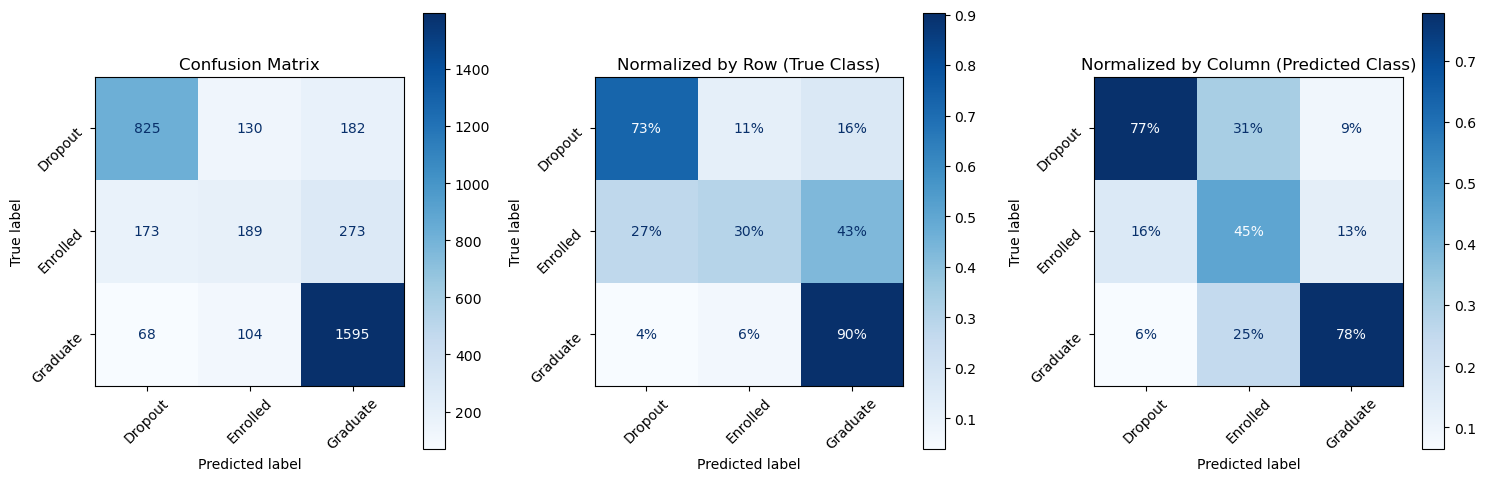

Error Analysis:

Confusion Matrix (numbers):
[[ 825  130  182]
 [ 173  189  273]
 [  68  104 1595]]

Class-wise accuracy:
  Dropout: 825/1137 = 72.56%
  Enrolled: 189/635 = 29.76%
  Graduate: 1595/1767 = 90.27%


In [13]:
# Step 11: Error Analysis with Confusion Matrix
# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf_scaled, X_train_scaled, y_train, cv=3)

# Get class names in sorted order (matching sklearn's default)
class_names = sorted(y_train.unique())

# Plot confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Standard confusion matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                        display_labels=class_names,
                                        ax=axes[0],
                                        cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=45)

# Normalized by row (true class)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", 
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[1],
                                        cmap='Blues')
axes[1].set_title('Normalized by Row (True Class)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=45)

# Normalized by column (predicted class)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="pred", 
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[2],
                                        cmap='Blues')
axes[2].set_title('Normalized by Column (Predicted Class)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

# Analyze errors
print("Error Analysis:")
print("="*50)
cm = confusion_matrix(y_train, y_train_pred, labels=class_names)
print("\nConfusion Matrix (numbers):")
print(cm)
print("\nClass-wise accuracy:")
for i, class_name in enumerate(class_names):
    correct = cm[i, i]
    total = cm[i, :].sum()
    accuracy = correct / total if total > 0 else 0
    print(f"  {class_name}: {correct}/{total} = {accuracy:.2%}")


Training final model on full training set...

Final Model Evaluation on Test Set
Test set accuracy: 0.7446 (74.46%)

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.77      0.77      0.77       284
    Enrolled       0.44      0.27      0.34       159
    Graduate       0.79      0.90      0.84       442

    accuracy                           0.74       885
   macro avg       0.67      0.65      0.65       885
weighted avg       0.72      0.74      0.73       885



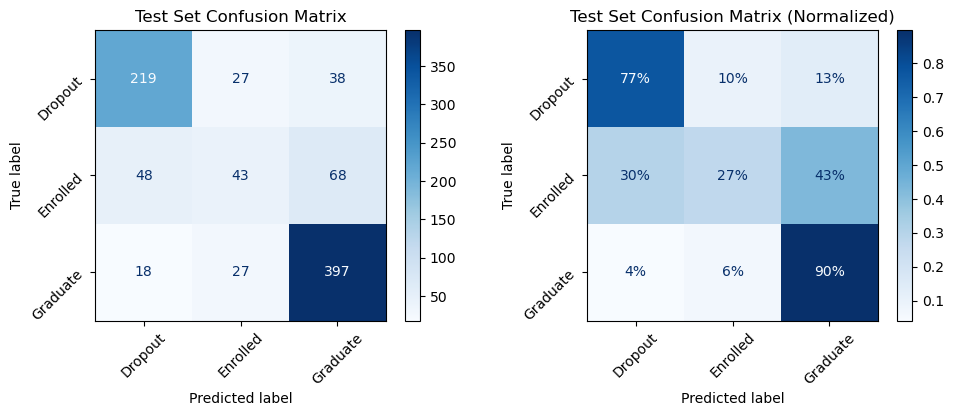


Train set accuracy: 0.7372 (73.72%)
Test set accuracy: 0.7446 (74.46%)
Difference: 0.0074 (0.74%)
  → Good generalization (small gap between train and test)


In [14]:
# Step 12: Final Model Evaluation on Test Set
from sklearn.metrics import accuracy_score, classification_report

# Train final model on full training set
print("Training final model on full training set...")
final_model = SGDClassifier(random_state=42, max_iter=1000)
final_model.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + "="*50)
print("Final Model Evaluation on Test Set")
print("="*50)
print(f"Test set accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Detailed classification report
print("\n" + "="*50)
print("Classification Report:")
print("="*50)
# Get the class names in the order sklearn uses
class_names = sorted(y_test.unique())
print(classification_report(y_test, y_test_pred, 
                            target_names=class_names))

# Confusion matrix for test set
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        display_labels=class_names,
                                        ax=axes[0],
                                        cmap='Blues', values_format='d')
axes[0].set_title('Test Set Confusion Matrix')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=45)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        normalize="true",
                                        values_format=".0%",
                                        display_labels=class_names,
                                        ax=axes[1],
                                        cmap='Blues')
axes[1].set_title('Test Set Confusion Matrix (Normalized)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

# Compare train vs test performance
# Use predictions from Step 11 (y_train_pred was defined there)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTrain set accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test set accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Difference: {abs(train_accuracy - test_accuracy):.4f} ({abs(train_accuracy - test_accuracy)*100:.2f}%)")
if abs(train_accuracy - test_accuracy) < 0.05:
    print("  → Good generalization (small gap between train and test)")
else:
    print("  → Possible overfitting (large gap between train and test)")


### Additional Advanced Topics


In [15]:
# Step 13: Multilabel Classification
# Create multiple binary labels for each student
# Example: Is the student at risk? (Dropout or Enrolled) AND Is the student successful? (Graduate)

from sklearn.neighbors import KNeighborsClassifier

# Create multilabel targets
# Label 1: Is the student at risk? (Dropout or Enrolled = True, Graduate = False)
y_train_at_risk = (y_train != 'Graduate')
# Label 2: Is the student a graduate? (Graduate = True, others = False)
y_train_graduate = (y_train == 'Graduate')
# Combine into multilabel format
y_multilabel = np.c_[y_train_at_risk, y_train_graduate]

print("Multilabel Classification Example:")
print("="*50)
print("Creating two labels for each student:")
print("  Label 1: At Risk (Dropout or Enrolled)")
print("  Label 2: Graduate")
print(f"\nMultilabel shape: {y_multilabel.shape}")
print(f"\nFirst 10 examples:")
for i in range(10):
    print(f"  Student {i+1}: At Risk={y_multilabel[i,0]}, Graduate={y_multilabel[i,1]} (Actual: {y_train.iloc[i]})")

# Train KNN for multilabel classification (supports multilabel natively)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_multilabel)

# Make a prediction
some_student = X_train_scaled[0:1]
prediction = knn_clf.predict(some_student)
print(f"\nPrediction for first student:")
print(f"  At Risk: {prediction[0, 0]}, Graduate: {prediction[0, 1]}")
print(f"  Actual: At Risk={y_multilabel[0, 0]}, Graduate={y_multilabel[0, 1]}")


Multilabel Classification Example:
Creating two labels for each student:
  Label 1: At Risk (Dropout or Enrolled)
  Label 2: Graduate

Multilabel shape: (3539, 2)

First 10 examples:
  Student 1: At Risk=False, Graduate=True (Actual: Graduate)
  Student 2: At Risk=True, Graduate=False (Actual: Dropout)
  Student 3: At Risk=True, Graduate=False (Actual: Enrolled)
  Student 4: At Risk=False, Graduate=True (Actual: Graduate)
  Student 5: At Risk=False, Graduate=True (Actual: Graduate)
  Student 6: At Risk=True, Graduate=False (Actual: Enrolled)
  Student 7: At Risk=True, Graduate=False (Actual: Dropout)
  Student 8: At Risk=True, Graduate=False (Actual: Dropout)
  Student 9: At Risk=True, Graduate=False (Actual: Dropout)
  Student 10: At Risk=True, Graduate=False (Actual: Dropout)

Prediction for first student:
  At Risk: False, Graduate: True
  Actual: At Risk=False, Graduate=True


c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [16]:
# Evaluate multilabel classifier
y_train_knn_pred = cross_val_predict(knn_clf, X_train_scaled, y_multilabel, cv=3)

# Calculate F1 score for multilabel (macro average - treats all labels equally)
f1_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(f"Multilabel F1 Score (macro average): {f1_macro:.4f}")

# Calculate F1 score with weighted average (weights by support)
f1_weighted = f1_score(y_multilabel, y_train_knn_pred, average="weighted")
print(f"Multilabel F1 Score (weighted average): {f1_weighted:.4f}")

# Calculate F1 score per label
f1_per_label = f1_score(y_multilabel, y_train_knn_pred, average=None)
print(f"\nF1 Score per label:")
print(f"  Label 1 (At Risk): {f1_per_label[0]:.4f}")
print(f"  Label 2 (Graduate): {f1_per_label[1]:.4f}")

# Using ClassifierChain for multilabel classification
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

# Create a chain classifier (each model uses predictions from previous models)
print("\n" + "="*50)
print("Training ClassifierChain (models in sequence):")
print("="*50)
chain_clf = ClassifierChain(SVC(random_state=42, probability=True), cv=3, random_state=42)
chain_clf.fit(X_train_scaled[:1000], y_multilabel[:1000])  # Using subset for speed

chain_prediction = chain_clf.predict(some_student)
print(f"Chain prediction for first student:")
print(f"  At Risk: {chain_prediction[0, 0]}, Graduate: {chain_prediction[0, 1]}")


Multilabel F1 Score (macro average): 0.7559
Multilabel F1 Score (weighted average): 0.7558

F1 Score per label:
  Label 1 (At Risk): 0.7355
  Label 2 (Graduate): 0.7762

Training ClassifierChain (models in sequence):
Chain prediction for first student:
  At Risk: 0.0, Graduate: 1.0


### Step 14: Model Comparison and Feature Importance


Training and comparing multiple models...
SGD Classifier      : 0.7372 (+/- 0.0115)
Random Forest       : 0.7632 (+/- 0.0196)
Logistic Regression : 0.7601 (+/- 0.0205)
Naive Bayes         : 0.6714 (+/- 0.0183)

Best model: Random Forest (CV accuracy: 0.7632)


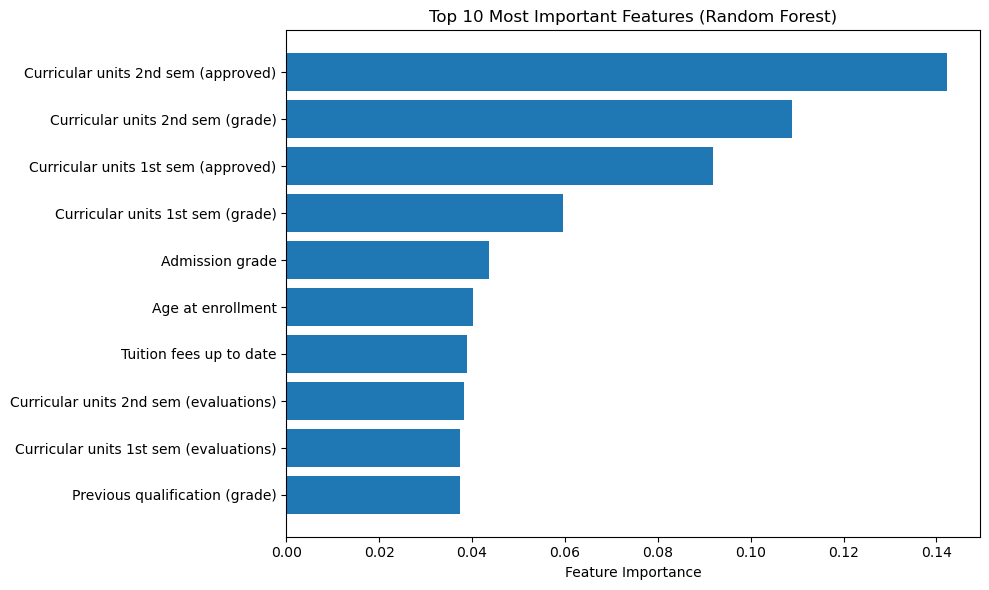


Top 10 Most Important Features:
 1. Curricular units 2nd sem (approved)     : 0.1423
 2. Curricular units 2nd sem (grade)        : 0.1090
 3. Curricular units 1st sem (approved)     : 0.0919
 4. Curricular units 1st sem (grade)        : 0.0596
 5. Admission grade                         : 0.0436
 6. Age at enrollment                       : 0.0403
 7. Tuition fees up to date                 : 0.0389
 8. Curricular units 2nd sem (evaluations)  : 0.0382
 9. Curricular units 1st sem (evaluations)  : 0.0375
10. Previous qualification (grade)          : 0.0375


In [17]:
# Step 14: Model Comparison and Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Train multiple models for comparison
models = {
    'SGD Classifier': SGDClassifier(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB()
}

print("Training and comparing multiple models...")
print("="*50)

results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    print(f"{name:20s}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['cv_mean'])
print(f"\nBest model: {best_model_name} (CV accuracy: {results[best_model_name]['cv_mean']:.4f})")

# Feature importance (for Random Forest)
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Get top 10 most important features
indices = np.argsort(feature_importance)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for i, idx in enumerate(indices, 1):
    print(f"{i:2d}. {feature_names[idx]:40s}: {feature_importance[idx]:.4f}")


### Step 15: Hyperparameter Tuning


In [18]:
# Step 15: Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

# Grid search for SGD Classifier
print("Performing Grid Search for SGD Classifier...")
print("="*50)

param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.01, 0.1]
}

# Use a smaller subset for faster grid search
sgd_grid = SGDClassifier(random_state=42, max_iter=1000)
grid_search = GridSearchCV(sgd_grid, param_grid, cv=3, scoring='accuracy', 
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled[:2000], y_train[:2000])  # Using subset for speed

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train best model on full training set
best_sgd = grid_search.best_estimator_
best_sgd.fit(X_train_scaled, y_train)

# Evaluate on test set
y_test_pred_best = best_sgd.predict(X_test_scaled)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f"\nTest set accuracy with tuned model: {test_accuracy_best:.4f} ({test_accuracy_best*100:.2f}%)")
print(f"Test set accuracy with default model: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Improvement: {(test_accuracy_best - test_accuracy)*100:.2f}%")


Performing Grid Search for SGD Classifier...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss'}
Best cross-validation score: 0.7565

Test set accuracy with tuned model: 0.7616 (76.16%)
Test set accuracy with default model: 0.7446 (74.46%)
Improvement: 1.69%


### Step 16: Visualizing Decision Boundaries (2D Projection)


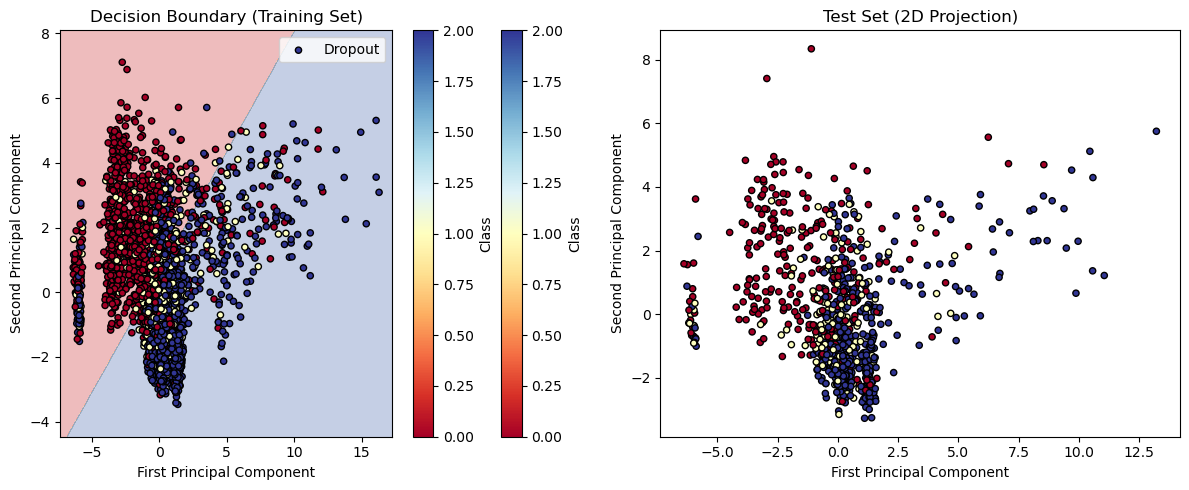

Variance explained by first 2 components: 27.64%
  Component 1: 17.70%
  Component 2: 9.94%


In [19]:
# Step 16: Visualizing Decision Boundaries (2D Projection)
# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train a classifier on 2D data
clf_2d = SGDClassifier(random_state=42, max_iter=1000)
clf_2d.fit(X_train_2d, y_train)

# Create a mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = LabelEncoder().fit_transform(Z)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=LabelEncoder().fit_transform(y_train), 
                     cmap=plt.cm.RdYlBu, edgecolors='black', s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary (Training Set)')
plt.colorbar(scatter, label='Class')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], loc='best')

plt.subplot(1, 2, 2)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=LabelEncoder().fit_transform(y_test), 
           cmap=plt.cm.RdYlBu, edgecolors='black', s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Test Set (2D Projection)')
plt.colorbar(scatter, label='Class')

plt.tight_layout()
plt.show()

print(f"Variance explained by first 2 components: {pca.explained_variance_ratio_.sum():.2%}")
print(f"  Component 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  Component 2: {pca.explained_variance_ratio_[1]:.2%}")


## Summary

This notebook covered the complete classification pipeline:

1. **Data Loading and Exploration**: Loaded and explored the student dropout dataset
2. **Train/Test Split**: Created stratified splits to maintain class distribution
3. **Binary Classification**: Trained a dropout detector (similar to MNIST's 5-detector)
4. **Cross-Validation**: Evaluated model performance using k-fold CV
5. **Confusion Matrix**: Analyzed classification errors
6. **Precision, Recall, F1**: Calculated detailed performance metrics
7. **Precision-Recall Trade-off**: Analyzed threshold selection
8. **ROC Curve**: Evaluated classifier using ROC AUC
9. **Multiclass Classification**: Extended to all three classes
10. **Feature Scaling**: Improved performance with StandardScaler
11. **Error Analysis**: Deep dive into classification errors
12. **Final Evaluation**: Test set performance assessment
13. **Multilabel Classification**: Multiple labels per instance
14. **Model Comparison**: Compared multiple algorithms and feature importance
15. **Hyperparameter Tuning**: Grid search for optimal parameters
16. **Visualization**: 2D projection and decision boundaries

### Key Findings:
- The dataset has 3 classes: Dropout, Enrolled, and Graduate
- Feature scaling significantly improves SGD classifier performance
- The model can be tuned for precision/recall trade-off based on requirements
- Random Forest provides feature importance insights
- Hyperparameter tuning can improve model performance
